<a href="https://colab.research.google.com/github/HariSudhan76/DataVisualization/blob/Matplotlib/MatplotlibBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Line Charts**

In [ ]:
inventory = pd.read_csv("housing_data.csv")


<ipython-input-139-b9fcf3ebfa27>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  inv_monthly = inv_monthly.resample("M").sum()/100000


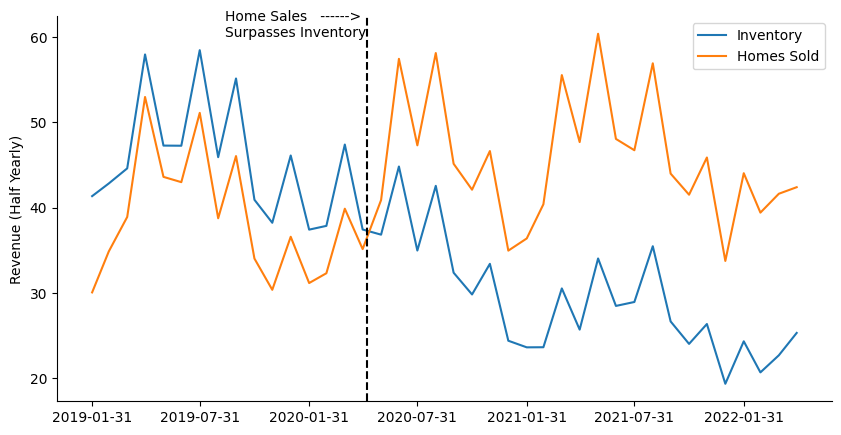

In [ ]:
#inv["startdate"]= pd.to_datetime(inventory["period_begin"])
housing = inventory.assign(period_begin=pd.to_datetime(inventory.period_begin))
inv = housing.groupby(by="period_begin")[[
    "inventory","total_homes_sold"
    ]].sum()
inv["startdate"] = inv.index.to_numpy().astype("datetime64[M]")
inv_monthly = inv[inv.index>='2019']
inv_monthly = inv_monthly.resample("M").sum()/100000
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(inv_monthly)
ax.set_ylabel("Revenue (Half Yearly)")
ax.set_xticks(inv_monthly.index[::6])
ax.legend(["Inventory","Homes Sold"])
ax.text(18150,60,"Home Sales   ------>\nSurpasses Inventory")
ax.axvline(18390,c="black",ls="--")
ax.spines[["right","top"]].set_visible(False)
plt.show()

# **Stacked Line Chart**

In [ ]:
ca_housing = inventory[inventory["region_name"].str.contains("CA")].assign(region_name=inventory.region_name.str[0:-11])
ca_housing["period_begin"] = ca_housing["period_begin"].to_numpy().astype("datetime64[M]")
ca_housing = ca_housing.set_index("period_begin").sort_index()
ca_housing_pivot = (
    ca_housing.pivot_table(index = "period_begin",
                           columns = "region_name",
                           values = "median_active_list_price")
                          .assign(CA_Average = lambda x:round(x.mean(axis=1),2))
                          .loc[:,["Los Angeles","San Diego","San Francisco","CA_Average"]]

)



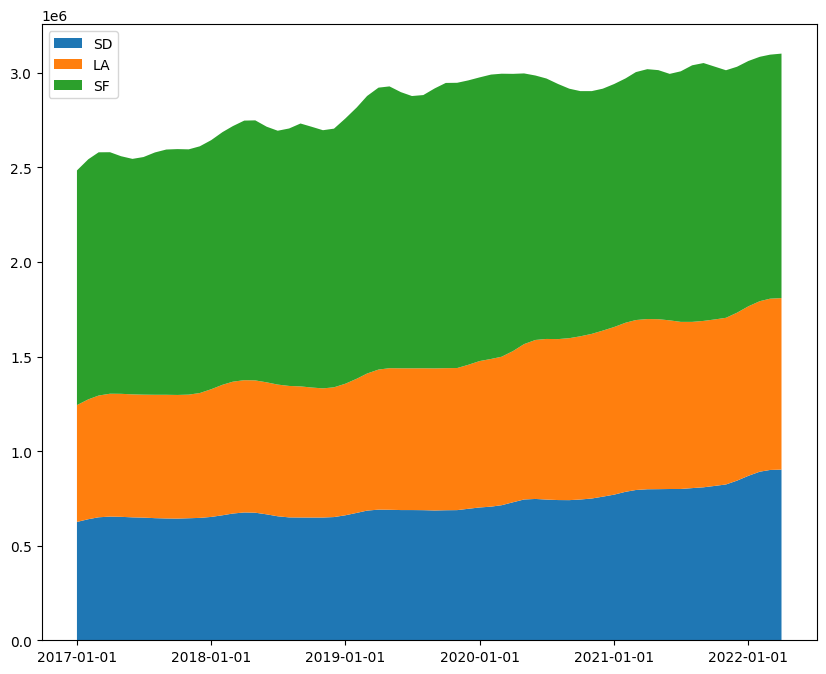

In [ ]:
fig, ax  = plt.subplots(figsize = (10,8))
labels = ["SD", "LA", "SF"]
ax.stackplot(ca_housing_pivot.index,ca_housing_pivot["San Diego"]
             ,ca_housing_pivot["Los Angeles"],
             ca_housing_pivot["San Francisco"],
             labels = labels,
             cmap='Pastel2'
             )

ax.set_xticks(ca_housing_pivot.index[::12])
ax.legend(loc="upper left")
plt.show()


# **Dual Axis Chart**

When 2 plots do no fit with same Y-axis we can show 1 on the left side and other with the right side.

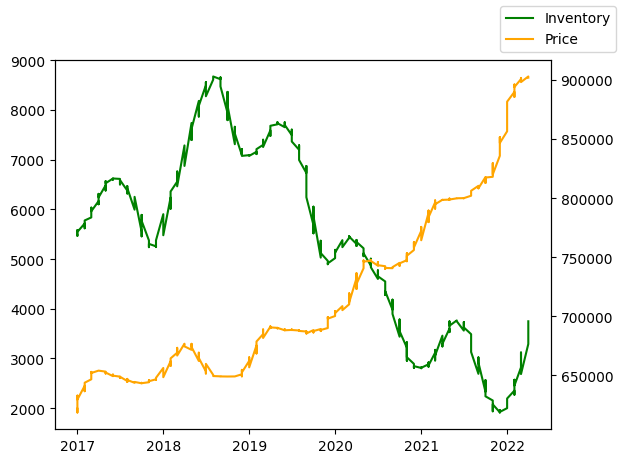

In [ ]:
sd_dual = ca_housing.loc[ca_housing.region_name=="San Diego",["inventory","median_active_list_price"]]
fig, ax = plt.subplots()
ax.plot(sd_dual.inventory,c="green",label="Inventory")
ax1 = ax.twinx()
ax1.plot(sd_dual.median_active_list_price,c="orange",label="Price")
fig.legend()
plt.show()


# Dual Axis line chart

Plot sum of nights booked and sum of cancellations on a quarterly basis

In [5]:
hotel = pd.read_excel("HotelCustomersDataset.xlsx",sheet_name="Sheet1")


<ipython-input-192-edb194699b3a>:2: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  - pd.to_timedelta(hotel["DaysSinceCreation"], unit="D")).astype("datetime64")


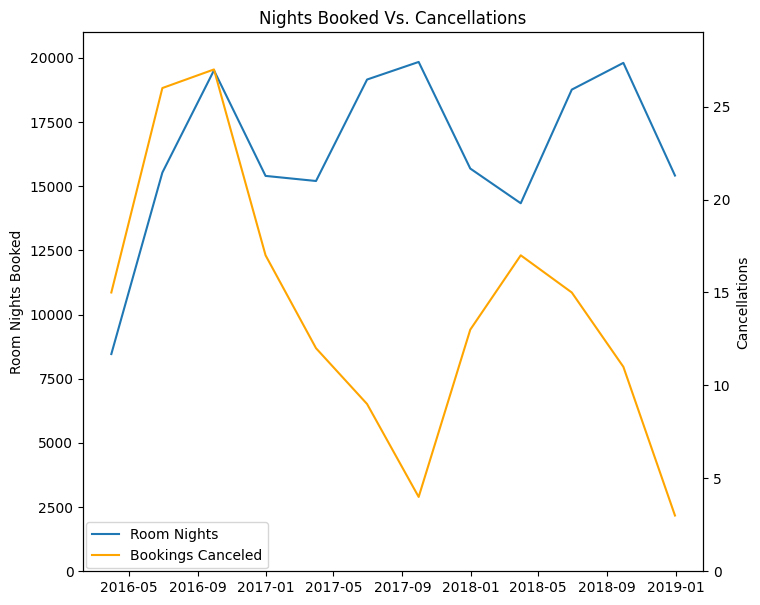

In [ ]:
hotel["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotel["DaysSinceCreation"], unit="D")).astype("datetime64")
room_nights = hotel.groupby("date").agg({"RoomNights":"sum","BookingsCanceled":"sum"})
rm = room_nights.resample("Q").sum()
fig, ax = plt.subplots(figsize=(8,7))
ax.plot(rm.RoomNights,label="Room Nights")
ax.set_ylabel("Room Nights Booked")
ax.set_ylim(0,21000)
ax.set_title("Nights Booked Vs. Cancellations")

ax1 = ax.twinx()
ax1.plot(rm.BookingsCanceled,c="Orange",label="Bookings Canceled")
ax1.set_ylabel("Cancellations")
ax1.set_ylim(0,29)

fig.legend(bbox_to_anchor =[.365,.19])
plt.show()

#  **Bar Chart**
Categorical comparison.
hotel roomnight prices vs countries
Lodging revenue vs countries (horizontal bar)

In [ ]:
hotel.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


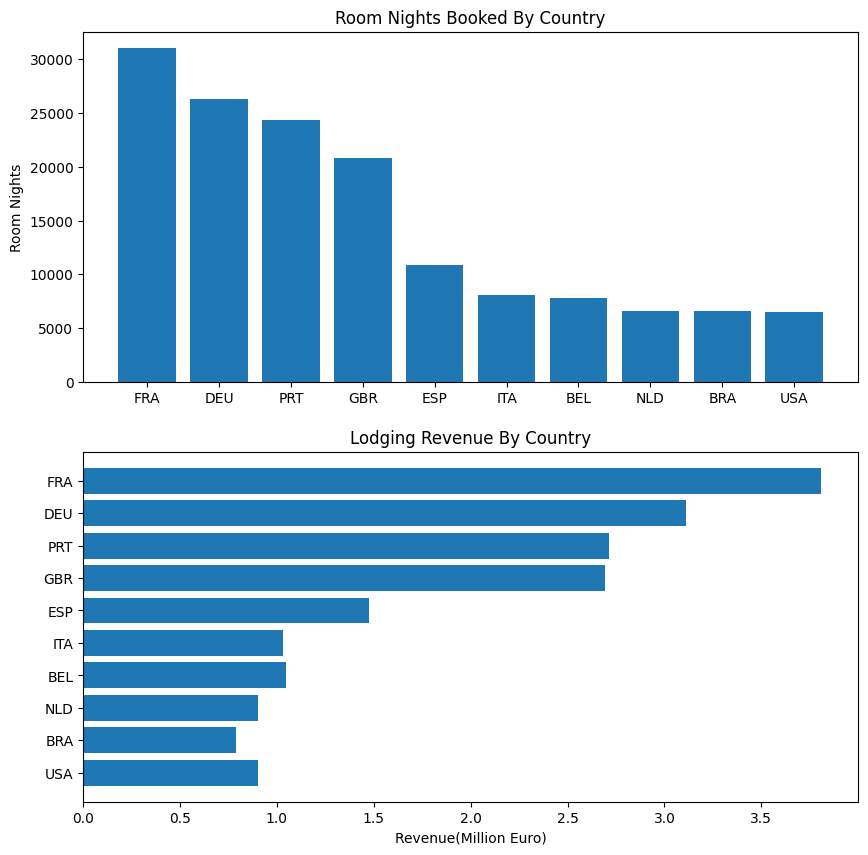

In [ ]:
price_room = (hotel.groupby("Nationality")
.agg({"RoomNights":"sum","LodgingRevenue":"sum"})
.sort_values("RoomNights",ascending=False)
.iloc[:10]
)

fig, ax = plt.subplots(2,figsize=(10,10))

ax[0].bar(price_room.index,price_room.RoomNights)
ax[0].set_title("Room Nights Booked By Country")
ax[0].set_ylabel("Room Nights" )

ax[1].barh(price_room.index[::-1],price_room.LodgingRevenue[::-1]/1000000)
ax[1].set_title("Lodging Revenue By Country")
ax[1].set_xlabel("Revenue(Million Euro)")



plt.show()

# Stacked Bar charts(including 100% stacked)
two more categories can be used in comparison along with normal bar chart.



In [ ]:
visitors = hotel[["Nationality","Age"]].loc[hotel["Nationality"].isin(["GBR","FRA","USA","DEU"])]
visitors = (visitors.assign(
    age_group = pd.cut(
                    visitors.loc[:,"Age"],
                    [0,2,12,18,44,60,100],
                    labels=["Infants","Children","Adolescents","Adults","Mid Aged Adults","Seniors"]
    )

))
vis = visitors.pivot_table(index="age_group",
                           columns="Nationality",
                           values="Age",
                           aggfunc="count"
                           )
vis

Nationality,DEU,FRA,GBR,USA
age_group,,,,
Infants,21,36,22,18
Children,237,356,200,121
Adolescents,284,370,179,77
Adults,3265,5141,3502,1177
Mid Aged Adults,3902,4532,2849,888
Seniors,2513,1977,1897,1147


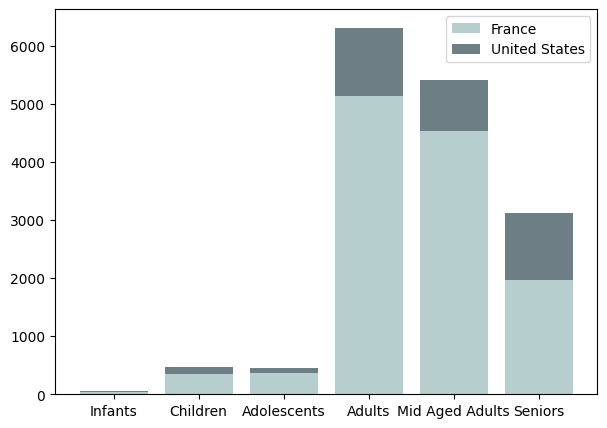

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

ax.bar(vis.index,vis["FRA"],label="France",color="#B7CECE")
ax.bar(vis.index,vis["USA"],label="United States",color="#6E7E85",bottom=vis["FRA"])
plt.legend()
plt.show()

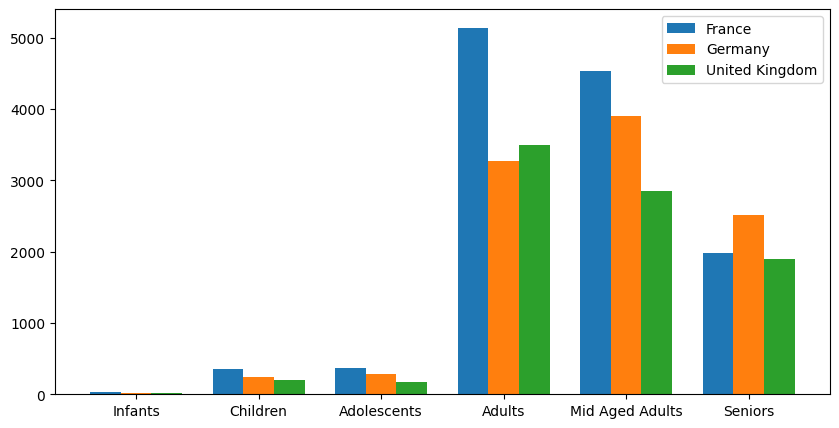

In [ ]:
width = .25
x1 = np.arange(len(vis))
x2 = [x+width for x in x1]
x3 = [x+width for x in x2]
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(
    x1,
    vis["FRA"],
    width = width,
    label = "France"
)
ax.bar(
    x2,
    vis["DEU"],
    width = width,
    label = "Germany"
)
ax.bar(
    x3,
    vis["GBR"],
    width = width,
    label = "United Kingdom"
)
ax.set_label("age_group")
ax.set_xticks(x2)
ax.set_xticklabels(vis.index)
plt.legend()
plt.show()

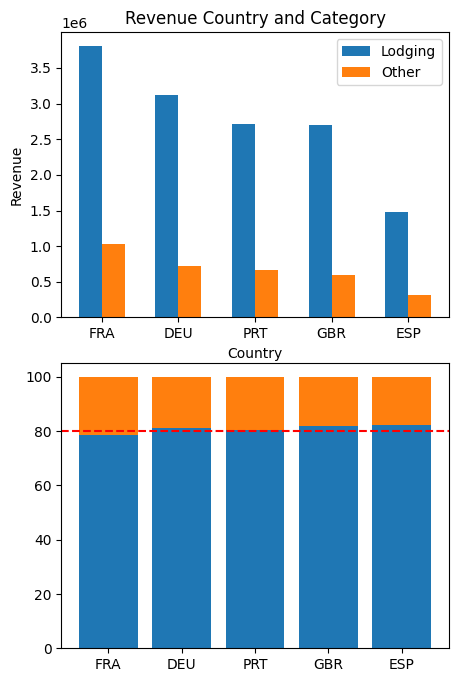

In [ ]:
rev = hotel[["Nationality","LodgingRevenue","OtherRevenue"]].loc[hotel["Nationality"].isin(["FRA","DEU","PRT","GBR","ESP"])]
h_rev = (rev.groupby("Nationality")
        .agg({"LodgingRevenue":"sum","OtherRevenue":"sum"})
        .sort_values("LodgingRevenue",ascending=False)
)
gr2 = h_rev.apply(lambda x: x*100/sum(x),axis=1)

fig, ax = plt.subplots(2,figsize=(5,8))
plt.subplots_adjust(hspace=.16)
width = .3
x1 = np.arange(len(h_rev))
x2 = [x+width for x in x1]
ax[0].bar(x1,h_rev.LodgingRevenue,width=width,label="Lodging")
ax[0].bar(x2,h_rev.OtherRevenue,width=width,label="Other")
ax[0].set_xticks((x1+x2)/2)
ax[0].set_xticklabels(h_rev.index)
ax[0].set_ylabel("Revenue")
ax[0].set_xlabel("Country")
ax[0].set_title("Revenue Country and Category")

ax[1].bar(gr2.index,gr2.LodgingRevenue,label="lodging")
ax[1].bar(gr2.index,gr2.OtherRevenue,label="Other",bottom=gr2.LodgingRevenue)
ax[1].axhline(80,0,1,c="red",ls="--")
ax[0].legend(bbox_to_anchor=(1,1))




plt.show()

# **Pie Chart**

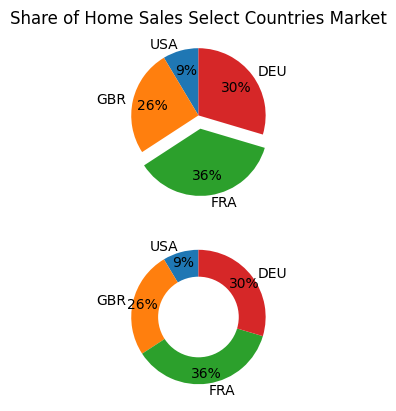

In [ ]:
pieplot = (hotel.loc[hotel["Nationality"].isin(["USA","GBR","FRA","DEU"])]
           .groupby("Nationality")
           .agg({"LodgingRevenue":"sum"})

)
fig, ax = plt.subplots(2)
plt.subplots_adjust(hspace=.2)
ax[0].pie(
          x= pieplot["LodgingRevenue"][::-1],
          startangle = 90,
          labels = pieplot.index[::-1],
          autopct="%.0f%%",
          pctdistance = .70,
          explode=(0,0,0.2,0)

)
ax[0].set_title("Share of Home Sales Select Countries Market")
ax[1].pie(
    x=pieplot["LodgingRevenue"][::-1],
    startangle=90,
    labels= pieplot.index[::-1],
    autopct="%.0f%%",
    pctdistance=.85
)

donut_hole = plt.Circle((0,0),.60,fc="white")
fig = plt.gcf()
fig.gca().add_artist(donut_hole)
plt.show()

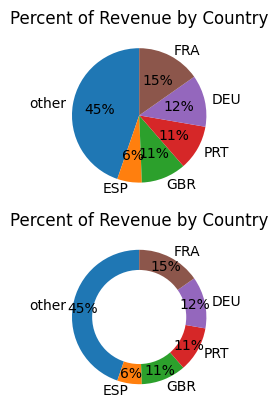

In [ ]:
hotel_pie = (hotel.groupby("Nationality")
.agg({"LodgingRevenue":"sum"})
.sort_values("LodgingRevenue",ascending=False)
)
hotel_pie = (pd.concat([hotel_pie.iloc[:5],
             pd.DataFrame({"LodgingRevenue":hotel_pie.iloc[5:,0].sum()},
             index=["other"])]
             )
).iloc[::-1]

fig, ax = plt.subplots(2)
ax[0].pie(x=hotel_pie.LodgingRevenue,
          labels=hotel_pie.index,
          startangle=90,
          autopct="%.0f%%"
          )
ax[0].set_title("Percent of Revenue by Country")
ax[1].pie(x=hotel_pie.LodgingRevenue,
          labels=hotel_pie.index,
          startangle=90,
          autopct="%.0f%%",
          pctdistance = .85
          )
ax[1].set_title("Percent of Revenue by Country")
donut_hole = plt.Circle((0,0),.7,fc="white")
fig = plt.gcf()
fig.gca().add_artist(donut_hole)
plt.show()

# **Scatter Plot & Bubble Chart**

scatter and bubble charts are both used to visualize relationship between 2 numeric variables


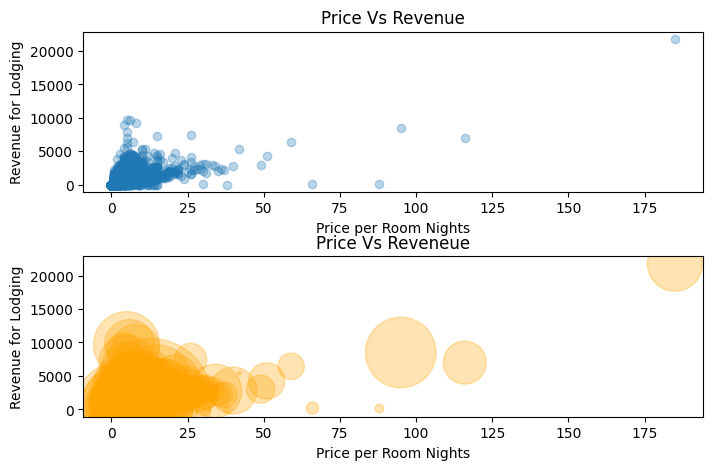

In [19]:
fig, ax = plt.subplots(2,figsize=(8,5))
plt.subplots_adjust(hspace=.4)
ax[0].scatter(hotel["RoomNights"],hotel["LodgingRevenue"],alpha=.3)
ax[0].set_title("Price Vs Revenue")
ax[0].set_xlabel("Price per Room Nights")
ax[0].set_ylabel("Revenue for Lodging")

ax[1].scatter(hotel["RoomNights"],hotel["LodgingRevenue"],s=hotel["OtherRevenue"],alpha=.3,c="orange")
ax[1].set_title("Price Vs Reveneue")
ax[1].set_xlabel("Price per Room Nights")
ax[1].set_ylabel("Revenue for Lodging")
plt.show()

Text(0.5, 1.0, 'Average Revenue vs. Avg Nights Stayed')

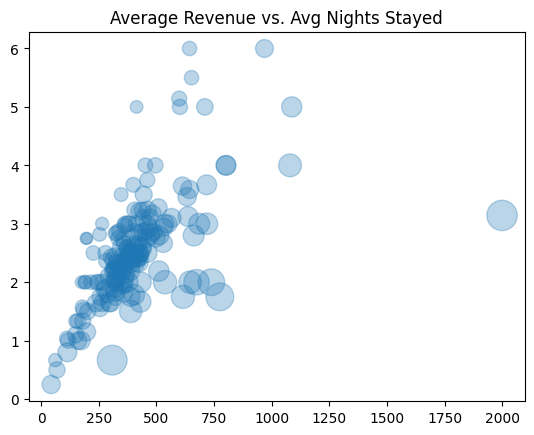

In [38]:
hotel = hotel.assign(total_revenue = hotel["LodgingRevenue"]+hotel["OtherRevenue"],
                     revenue_per_night = lambda x: x["total_revenue"]/x["RoomNights"]
                     )
agg_hotel = hotel.groupby("Nationality").agg(
                                      total_revenue = ("total_revenue","sum"),
                                      avg_revenue = ("total_revenue","mean"),
                                      avg_age = ("Age","mean"),
                                      avg_nights = ("RoomNights","mean"),
                                      avg_nightly_revenue = ("revenue_per_night","mean")


)
fig, ax = plt.subplots()
ax.scatter(agg_hotel.avg_revenue,agg_hotel.avg_nights,s=agg_hotel.avg_nightly_revenue,alpha=.3)
ax.set_title("Average Revenue vs. Avg Nights Stayed")

# **Histograms**
distribution of numeric variables

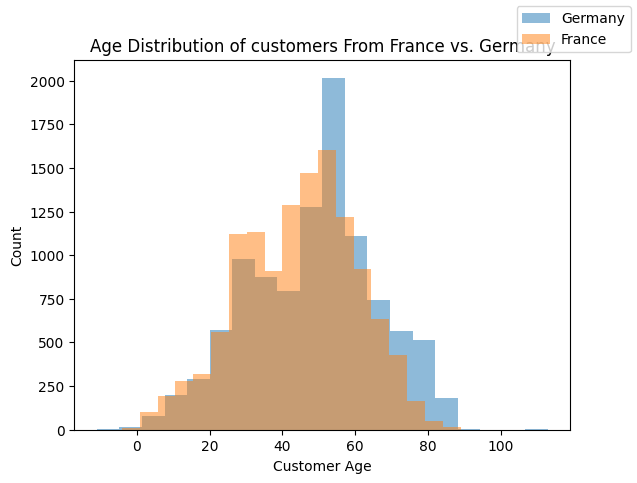

In [48]:

fig, ax = plt.subplots()
ax.hist(hotel.loc[hotel["Nationality"]=="DEU","Age"],alpha=.5,
        bins=20
)
ax.hist(hotel.loc[hotel["Nationality"]=="FRA","Age"],alpha=.5,
        bins=20
        )
fig.legend(["Germany","France"])
ax.set_xlabel("Customer Age")
ax.set_ylabel("Count")
ax.set_title("Age Distribution of customers From France vs. Germany")
plt.show()